# NAI 22 - initial model

In [ ]:
# 1. layer of BiLSTM 1024 of hidden units
# 2. layer of BiLSTM
# classification head W with MLPs
## 2048
## 1024
## 345

# Adam optimiser with learning rate 1e-3

# Train for 10 epochs with batch size of 256

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes

# Special activation function 
# https://stackoverflow.com/questions/43915482/how-do-you-create-a-custom-activation-function-with-keras

# paper: https://openaccess.thecvf.com/content/CVPR2022/papers/Yang_Finding_Badly_Drawn_Bunnies_CVPR_2022_paper.pdf
# data: https://github.com/googlecreativelab/quickdraw-dataset

# Input 
#   What is the input, it dimensions?
#   Should be in initial shape, [[x,y,t]]
#   Look into sketch rnn
#   https://arxiv.org/pdf/1704.03477.pdf It uses BILSTM

#   what is the input layer, is it one dimensional?
#   Should there be a layer/block of layers for input 

# Internal
#   Should we make 4 models for each custom activation function
#   Get classification working

#   What is the bilstm activation function
#   Use default


# Custom activation functions
#   Explain maybe these to us, they are quite unclear
#   What does some of the symbols mean there?


# Loss function
#   What about loss function


# output
#   What should be output? Is it 345 classes, where each represents how well is this class drawn?

#   Train on classification first to see if the network works
#   Ask from the hpc.ut.ee to help with computation, add email also to Jaan. They should give access. through ssh.
#   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


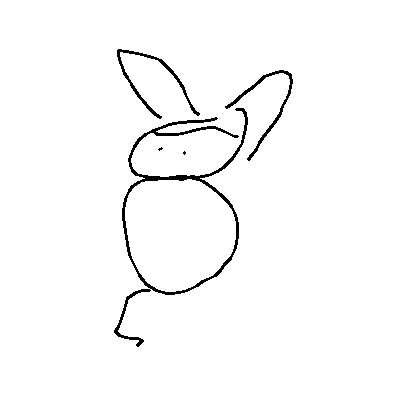

In [ ]:
bunny = [
  [
    [216.69900512695312, 209.3179931640625, 199.6300048828125, 193.0229949951172, 180.29600524902344, 174.6739959716797, 169.8000030517578, 164.9080047607422, 156.16400146484375, 151.89199829101562, 145.41299438476562, 139.63299560546875, 134.13999938964844, 131.11300659179688, 129.58399963378906, 130.05299377441406, 132.28700256347656, 136.75, 144.1699981689453, 151.10000610351562, 157.08599853515625, 163.8350067138672, 173.24000549316406, 178.78700256347656, 186.02499389648438, 193.0189971923828, 197.7949981689453, 201.83099365234375, 208.5189971923828, 217.53900146484375, 223.2740020751953, 228.02699279785156, 232.2790069580078, 238.572998046875, 242.30099487304688, 243.60000610351562, 245.5989990234375, 246.06199645996094, 245.4250030517578, 242.4600067138672, 236.5030059814453, 236.5030059814453],
    [118.26499938964844, 120.9949951171875, 121.08999633789062, 121.5989990234375, 122.97999572753906, 123.63200378417969, 124.52999877929688, 126.0469970703125, 129.1300048828125, 131.4199981689453, 134.69500732421875, 139.9219970703125, 146.38600158691406, 153.3820037841797, 159.14700317382812, 165.13400268554688, 170.4010009765625, 174.1619873046875, 176.18798828125, 177.92098999023438, 177.95199584960938, 178.45401000976562, 177.4849853515625, 177.718994140625, 177.718994140625, 176.9849853515625, 177.218994140625, 176.4849853515625, 175.25299072265625, 171.05300903320312, 167.0830078125, 162.85598754882812, 158.864990234375, 149.8990020751953, 142.70599365234375, 136.9340057373047, 129.46499633789062, 120.82699584960938, 113.89599609375, 109.10000610351562, 109.03399658203125, 109.03399658203125],
    [0, 116, 152, 187, 192, 203, 217, 236, 278, 287, 318, 351, 387, 420, 454, 488, 522, 557, 590, 608, 624, 644, 658, 681, 694, 711, 728, 745, 763, 796, 813, 829, 851, 885, 897, 916, 938, 953, 988, 1019, 1053, 1088]
  ],
  [
    [184.24400329589844, 184.24400329589844],
    [153.73800659179688, 153.73800659179688],
    [1535, 1601]
  ],
  [
    [184.24400329589844, 184.24400329589844],
    [152.73800659179688, 152.73800659179688],
    [2149, 2219]
  ],
  [
    [161.2760009765625, 159.7779998779297],
    [148.24200439453125, 149.24099731445312],
    [2645, 2717]
  ],
  [
    [152.28799438476562, 157.95399475097656, 161.97999572753906, 169.875, 176.40699768066406, 182.15899658203125, 190.21499633789062, 197.59800720214844, 203.86000061035156, 209.61399841308594, 214.3730010986328, 219.39700317382812, 224.1230010986328, 230.11599731445312, 234.87600708007812, 237.86900329589844],
    [130.25599670410156, 134.2220001220703, 134.5679931640625, 134.7530059814453, 134.01699829101562, 133.7530059814453, 131.13600158691406, 129.28900146484375, 128.0229949951172, 127.02400207519531, 127.25799560546875, 129.7239990234375, 131.22300720214844, 134.2209930419922, 136.718994140625, 136.75100708007812],
    [3499, 3617, 3626, 3654, 3698, 3725, 3752, 3793, 3820, 3853, 3886, 3941, 3979, 4022, 4082, 4122]
  ],
  [
    [160.77699279785156, 155.78399658203125, 148.88800048828125, 144.28900146484375, 138.38699340820312, 131.38099670410156, 127.61599731445312, 124.65899658203125, 122.88999938964844, 120.9000015258789, 118.86699676513672, 118.33599853515625, 126.45899963378906, 131.41700744628906, 137.39500427246094, 145.06500244140625, 152.08599853515625, 156.11199951171875, 160.39700317382812, 164.87100219726562, 171.39999389648438, 176.19500732421875, 180.68600463867188, 183.6790008544922, 185.71200561523438, 188.20799255371094, 191.43699645996094, 194.43299865722656, 198.16600036621094],
    [117.26600646972656, 114.76800537109375, 107.63400268554688, 102.97999572753906, 95.38900756835938, 84.65299987792969, 77.64799499511719, 73.4320068359375, 67.22099304199219, 62.477996826171875, 55.677001953125, 50.647003173828125, 51.78399658203125, 52.78300476074219, 53.78599548339844, 55.514007568359375, 57.02000427246094, 58.51100158691406, 60.75199890136719, 64.20799255371094, 71.44000244140625, 77.20700073242188, 83.197998046875, 88.68899536132812, 94.45899963378906, 100.68600463867188, 106.68099975585938, 111.94200134277344, 114.4739990234375],
    [5611, 5664, 5721, 5738, 5764, 5816, 5835, 5858, 5889, 5897, 5924, 5952, 6056, 6081, 6094, 6109, 6125, 6144, 6159, 6190, 6211, 6243, 6283, 6312, 6346, 6386, 6413, 6448, 6495]
  ],
  [
    [226.18600463867188, 234.4029998779297, 239.87899780273438, 245.2010040283203, 252.4320068359375, 259.0039978027344, 264.5450134277344, 270.52899169921875, 276.5159912109375, 281.27899169921875, 286.2770080566406, 290.2980041503906, 291.8299865722656, 290.86199951171875, 289.6300048828125, 287.1700134277344, 282.9570007324219, 280.2120056152344, 275.0190124511719, 264.635009765625, 259.8290100097656, 256.03900146484375, 251.97500610351562, 248.45599365234375],
    [107.77400207519531, 102.177001953125, 97.21800231933594, 92.71200561523438, 87.21099853515625, 81.24099731445312, 76.62100219726562, 74.09700012207031, 72.5679931640625, 71.5679931640625, 72.03599548339844, 75.00100708007812, 82.20399475097656, 86.66600036621094, 92.12600708007812, 97.84199523925781, 106.31100463867188, 113.76699829101562, 121.99299621582031, 135.89599609375, 142.7270050048828, 149.74899291992188, 155.88101196289062, 159.16598510742188],
    [6883, 7015, 7037, 7052, 7064, 7114, 7145, 7165, 7203, 7235, 7279, 7322, 7382, 7396, 7411, 7421, 7440, 7457, 7482, 7496, 7507, 7525, 7560, 7631]
  ],
  [
    [186.24099731445312, 181.7480010986328, 175.75599670410156, 171.26199340820312, 166.33399963378906, 161.83599853515625, 155.88400268554688, 147.92100524902344, 142.4010009765625, 138.3699951171875, 132.38299560546875, 129.1199951171875, 126.125, 124.59100341796875, 123.09500122070312, 123.3290023803711, 124.06300354003906, 125.06099700927734, 126.06199645996094, 127.05999755859375, 128.79100036621094, 130.78199768066406, 133.28399658203125, 136.51400756835938, 139.74099731445312, 142.51100158691406, 146.7239990234375, 151.21800231933594, 156.95199584960938, 166.3979949951172, 172.1300048828125, 178.15199279785156, 184.15499877929688, 191.3769989013672, 197.093994140625, 202.89500427246094, 209.60699462890625, 215.60899353027344, 220.36900329589844, 224.625, 230.58599853515625, 234.83900451660156, 236.61199951171875, 237.8699951171875, 237.9040069580078, 236.93499755859375, 234.9759979248047, 231.9949951171875, 227.31500244140625, 222.5780029296875, 213.40699768066406, 207.9250030517578, 203.8820037841797, 198.13900756835938, 189.70899963378906, 185.1840057373047, 181.14300537109375, 176.80599975585938, 176.2550048828125],
    [178.218994140625, 179.21798706054688, 178.218994140625, 178.218994140625, 178.218994140625, 178.218994140625, 179.45098876953125, 179.21798706054688, 180.45001220703125, 182.18499755859375, 186.4119873046875, 190.64199829101562, 196.60400390625, 203.3489990234375, 211.0679931640625, 217.82501220703125, 224.8280029296875, 231.81900024414062, 237.59201049804688, 243.58401489257812, 250.80499267578125, 257.0469970703125, 263.0610046386719, 269.78900146484375, 275.0459899902344, 279.8210144042969, 284.2959899902344, 287.3290100097656, 290.8320007324219, 293.593994140625, 293.62799072265625, 292.89599609375, 291.1600036621094, 288.4289855957031, 285.2229919433594, 281.9309997558594, 278.4410095214844, 275.43798828125, 270.70599365234375, 264.97900390625, 258.7489929199219, 250.56399536132812, 243.1099853515625, 235.17401123046875, 224.73599243164062, 218.1510009765625, 212.89999389648438, 206.12100219726562, 201.1300048828125, 196.35699462890625, 188.44198608398438, 184.13198852539062, 181.58099365234375, 179.5419921875, 177.77801513671875, 176.52200317382812, 176.48599243164062, 176.22000122070312, 176.22000122070312],
    [8984, 9135, 9234, 9283, 9325, 9353, 9393, 9420, 9456, 9496, 9541, 9584, 9613, 9644, 9688, 9718, 9745, 9785, 9815, 9848, 9888, 9919, 9948, 9987, 10042, 10073, 10107, 10127, 10162, 10221, 10248, 10270, 10306, 10339, 10381, 10412, 10445, 10485, 10513, 10553, 10589, 10614, 10631, 10649, 10668, 10694, 10711, 10724, 10736, 10753, 10773, 10797, 10817, 10831, 10850, 10864, 10882, 10914, 10995]
  ],
  [
    [149.79200744628906, 142.63600158691406, 136.40699768066406, 131.64199829101562, 127.3949966430664, 125.35800170898438, 124.01499938964844, 122.36100006103516, 120.13600158691406, 118.11599731445312, 115.86299896240234, 119.83399963378906, 125.52899932861328, 131.97999572753906, 137.74600219726562, 142.302001953125, 137.3090057373047],
    [290.1310119628906, 290.1310119628906, 292.0979919433594, 295.3320007324219, 298.8210144042969, 305.75799560546875, 309.8030090332031, 315.5190124511719, 321.8489990234375, 326.90399169921875, 331.31201171875, 335.59600830078125, 337.3290100097656, 338.32598876953125, 338.5929870605469, 340.5920104980469, 345.5880126953125],
    [11627, 11690, 11728, 11793, 11808, 11840, 11855, 11895, 11931, 11951, 12002, 12291, 12398, 12455, 12499, 12596, 12750]
  ]
]
from PIL import Image
from IPython.display import display
import cv2

bunny = np.array(bunny)
bunny.shape
bunny_stroke_loc =  [list(zip(stroke[0],stroke[1]))for stroke in bunny]
max(bunny_stroke_loc)

image = np.full((400,400,3),(255,255,255),dtype=np.uint8)
for stroke in bunny_stroke_loc:
  last_point = int(stroke[0][0]),int(stroke[0][1])
  for x,y in stroke:
    x,y = int(x),int(y)
    cv2.line(image, last_point, (x,y), (0,0,0), 2)
    last_point = (x,y)
display(Image.fromarray(image))

In [ ]:
from keras.layers import Bidirectional
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
import numpy as np

In [ ]:
model = keras.Sequential()
model.add(Bidirectional(LSTM(1024))) # biLSTM two layer
model.add(Bidirectional(LSTM(1024)))
model.add(keras.layers.Dense(2048)) # MLP 2048-1024-345
model.add(keras.layers.Dense(1024))
model.add(keras.layers.Dense(345)) # , activation='custom'
#sgdr = CyclicLR(min_lr=0.0, max_lr=0.05, base_epochs=10, mul_epochs=2)
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

#SGDR (Cosine Annealing) Callback for Keras: https://gist.github.com/Callidior/747eb767862c9d48f9d900a6373b16d1
def learning_rate(epoch):
  return min_lr + 0.5 * (max_lr - min_lr) * (1 + cos(pi * epoch/num_epochs))